In [1]:
# Загрузка зависимостей
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

Using TensorFlow backend.


In [2]:
# Загрузка подготовленного набора данных
dataset = pd.read_csv('prepared_data.csv')
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,num
0,0.927622,1.0,1.000000,0.624287,0.410173,1.0,0.000000,0.090789,0.0,0.552201,0.000000,0.0,1.0
1,-2.117138,1.0,0.816497,0.454038,0.457160,0.0,0.707107,1.444548,0.0,0.715169,0.000000,0.0,1.0
2,-1.529863,0.0,0.577350,0.454038,0.321489,0.0,0.000000,0.931137,0.0,0.398844,1.000000,0.0,1.0
3,0.253797,1.0,0.577350,0.335019,0.418709,0.0,0.707107,1.141680,0.0,0.265991,1.000000,0.0,1.0
4,0.355054,0.0,0.000000,0.335019,0.689241,0.0,0.707107,0.601134,1.0,0.210865,1.000000,0.0,1.0
5,0.355054,1.0,0.000000,0.568560,0.281039,0.0,0.707107,0.008368,0.0,0.145476,0.707107,0.0,1.0
6,0.253797,0.0,0.577350,0.568560,0.565328,0.0,0.000000,0.212382,0.0,0.379044,0.707107,0.0,1.0
7,-1.125867,1.0,0.577350,0.335019,0.490983,0.0,0.707107,0.966733,0.0,0.314559,1.000000,0.0,1.0
8,-0.170168,1.0,0.816497,0.909866,0.304932,1.0,0.707107,0.563348,0.0,0.179818,1.000000,0.0,1.0
9,0.355054,1.0,0.816497,0.679061,0.191945,0.0,0.707107,1.002123,0.0,0.436427,1.000000,0.0,1.0


In [3]:
X = dataset.drop(columns=['age']).values
Y = dataset['age'].values

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4)

In [5]:
# Задаем параметры структуры нейронной сети.


input_layer_size = 12


first_hidden_layer_size = 10
second_hidden_layer_size = 15

output_layer_size = 1


epochs_number = 105
batch_size = 36

In [6]:
# Создание нейронной сети прямого распространения, пока она пустая, т.е. не содержит слоёв и нейронов.
model = Sequential()

# Входной слой и первый скрытый слой, функция активации - ReLU
model.add(Dense(first_hidden_layer_size, input_dim=input_layer_size, activation='relu'))

model.add(Dense(second_hidden_layer_size, activation='relu'))


model.add(Dense(output_layer_size, activation='linear'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                165       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 16        
Total params: 311
Trainable params: 311
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Настройка нейронной сети.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

In [9]:
# Обучение нейронной сети.
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=epochs_number, batch_size=batch_size)

Train on 181 samples, validate on 122 samples
Epoch 1/105
181/181 [==============================] - 0s 1ms/step - loss: 1.4480 - mean_absolute_error: 0.9403 - mean_squared_error: 1.4480 - val_loss: 1.1284 - val_mean_absolute_error: 0.8307 - val_mean_squared_error: 1.1284
Epoch 2/105
181/181 [==============================] - 0s 310us/step - loss: 1.3543 - mean_absolute_error: 0.9158 - mean_squared_error: 1.3543 - val_loss: 1.0632 - val_mean_absolute_error: 0.8126 - val_mean_squared_error: 1.0632
Epoch 3/105
181/181 [==============================] - 0s 152us/step - loss: 1.2917 - mean_absolute_error: 0.8990 - mean_squared_error: 1.2917 - val_loss: 1.0280 - val_mean_absolute_error: 0.8007 - val_mean_squared_error: 1.0280
Epoch 4/105
181/181 [==============================] - 0s 134us/step - loss: 1.2539 - mean_absolute_error: 0.8864 - mean_squared_error: 1.2539 - val_loss: 0.9961 - val_mean_absolute_error: 0.7901 - val_mean_squared_error: 0.9961
Epoch 5/105
181/181 [===================

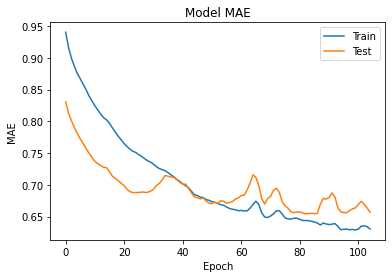

In [10]:
# Выводим динамику среднего абсолютного отклонения от номера эпохи обучения.
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error']) 
plt.title('Model MAE') 
plt.ylabel('MAE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

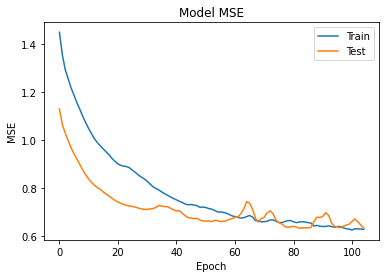

In [11]:
# Выводим динамику среднеквадратического отклонения, т.е. значения функции потерь, от номера эпохи обучения.
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']) 
plt.title('Model MSE') 
plt.ylabel('MSE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

In [12]:
# Предсказание уже обученной нейронной сети на обучающей выборке:
Y_pred_train = model.predict(X_train).flatten()

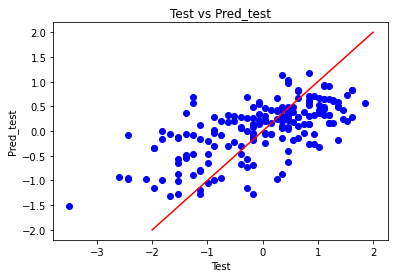

In [13]:
# Сравним эталонные значения Y_train и результат работы обученной нейронной сети Y_pred_train для обучающей выборки.
plt.plot(Y_train, Y_pred_train, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

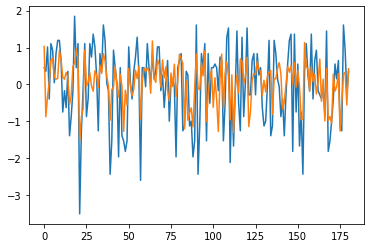

In [14]:
# Выведем сами значения Y_train и Y_pred_train.
plt.plot(Y_train)
plt.plot(Y_pred_train)
plt.show()

In [15]:
# Предсказание обученной нейронной сети на тестовой выборке:
Y_pred_test = model.predict(X_test).flatten()

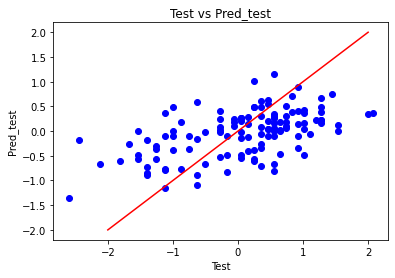

In [16]:
# Сравним эталонные значения Y_test и результат работы обученной нейронной сети Y_pred_test для тестовой выборки.
plt.plot(Y_test, Y_pred_test, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

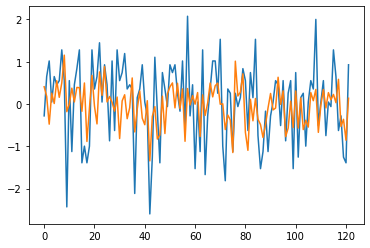

In [17]:
# Выведем сами значения Y_test и Y_pred_test.
plt.plot(Y_test)
plt.plot(Y_pred_test)
plt.show()

In [18]:
# Сравним среднеквадратичные ошибки (значения функции потерь) для обучающей и тестовой выборок.
print(np.sqrt(mean_squared_error(Y_train, Y_pred_train)))
print(np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

0.7973678779479242
0.7941926180467772


In [19]:
# Проверим на нормальное распределение разности пар (Y_train, Y_pred_train), (Y_test, Y_pred_test)
k_train, p_train = stats.shapiro(Y_train - Y_pred_train)
print('Train k = {0}, p = {1}'.format(k_train, p_train))

k_test, p_test = stats.shapiro(Y_test - Y_pred_test)
print('Test k = {0}, p = {1}'.format(k_test, p_test))

Train k = 0.9823422431945801, p = 0.021747596561908722
Test k = 0.9842708110809326, p = 0.1683357059955597


In [20]:
# Для полной выборки (Y, Y_pred) применим два статистических теста: shapiro и normaltest.
Y_pred = model.predict(X).flatten()

k_s, p_s = stats.shapiro(Y - Y_pred)
print('k_s = {0}, p_s = {1}'.format(k_s, p_s))

k_n, p_n = stats.normaltest(Y - Y_pred)
print('k_n = {0}, p_n = {1}'.format(k_n, p_n))

k_s = 0.9866715669631958, p_s = 0.006723226513713598
k_n = 7.719200062955238, p_n = 0.021076427745079583


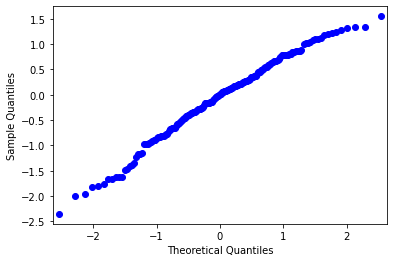

In [21]:
# И тоже самое визуально, с помощью грфиков квантиль-квантиль.
# Обучающая выборка
qqplot(Y_train - Y_pred_train)
plt.show()

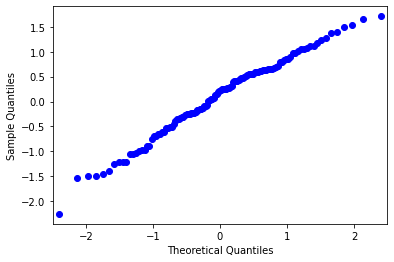

In [22]:
# Тестовая выборка
qqplot(Y_test - Y_pred_test)
plt.show()

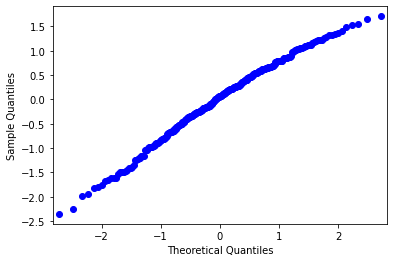

In [23]:
# Полная выборка
qqplot(Y - Y_pred)
plt.show()

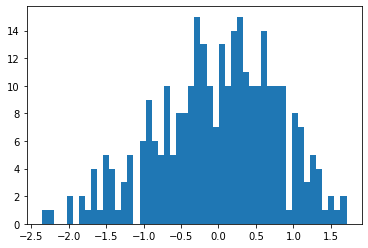

In [24]:
plt.hist(Y - Y_pred, bins=50)
plt.show()

In [25]:
model.save('SimpleNeuralNetwork.h5')